# Sparkling Titanic

In [1]:
# imports
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# make graphs beautiful
plt.style.use('ggplot')
plt.rc('font', family='sans-serif') 
%matplotlib inline

In [2]:
sqlContext = SQLContext(sc)
    
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


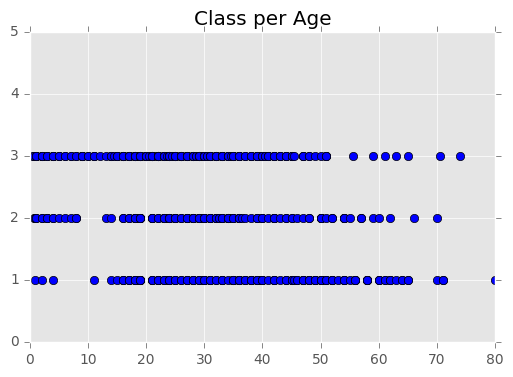

In [3]:
sorted_by_age = train.sort_values(['Age'])
plt.plot(sorted_by_age.Age, sorted_by_age.Pclass, 'bo')
plt.title('Class per Age')
plt.ylim([0, 5])
plt.show()

In [4]:
# drop useless columns
drop_elements = ['PassengerId', 'Name']
train = train.drop(drop_elements, axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Here, I want to find the percentance of people that survived based on their class  
**pclass**: A proxy for socio-economic status (SES)  

    1st = Upper
    2nd = Middle
    3rd = Lower

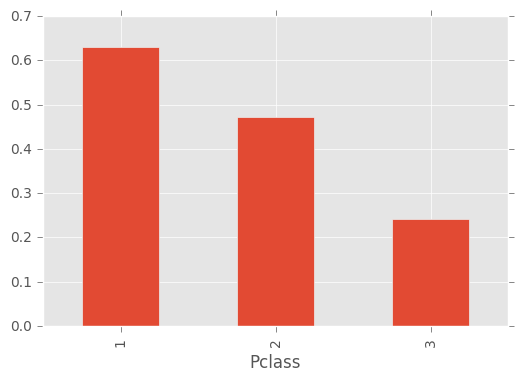

In [5]:
total_elements = train.groupby(train.Pclass).Survived.count()
total_survived = train[train.Survived == 1].groupby(train.Pclass).Survived.count()
(total_survived / total_elements).plot.bar()

As expected, most of the upper class survived, while the lower class had less odds to survive.

Now, I am interested on the average price per ticket for each class.

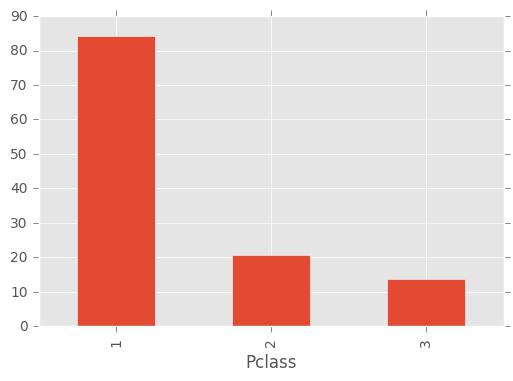

In [6]:
avg_prices = train.groupby(train.Pclass).Fare.mean()
avg_prices.plot.bar()